In [1]:
#Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Reading/importing Data
data1 = pd.read_csv('/Users/mountasser/Desktop/Used Cars Project/archive/Dataset1.csv', on_bad_lines='skip')
data2 = pd.read_csv('/Users/mountasser/Desktop/Used Cars Project/archive/Dataset2.csv')

In [4]:
#A quick look to the first dataset
data1.head()

Id  Price  Year  Mileage            City State                Vin   Make  \
0   1  16472  2015    18681  Jefferson City    MO  KL4CJBSBXFB267643  Buick   
1   2  15749  2015    27592        Highland    IN  KL4CJASB5FB245057  Buick   
2   3  16998  2015    13650           Boone    NC  KL4CJCSB0FB264921  Buick   
3   4  15777  2015    25195     New Orleans    LA  KL4CJASB4FB217542  Buick   
4   5  16784  2015    22800       Las Vegas    NV  KL4CJBSB3FB166881  Buick   

               Model  
0  EncoreConvenience  
1          EncoreFWD  
2      EncoreLeather  
3          EncoreFWD  
4  EncoreConvenience

In [5]:
#A quick look to the second dataset
data2.head()

Price  Year  Mileage              City State                Vin   Make  \
0   8995  2014    35725           El Paso    TX  19VDE2E53EE000083  Acura   
1  10888  2013    19606  Long Island City    NY  19VDE1F52DE012636  Acura   
2   8995  2013    48851           El Paso    TX  19VDE2E52DE000025  Acura   
3  10999  2014    39922           Windsor    CO  19VDE1F71EE003817  Acura   
4  14799  2016    22142            Lindon    UT  19UDE2F32GA001284  Acura   

          Model  
0    ILX6-Speed  
1    ILX5-Speed  
2    ILX6-Speed  
3    ILX5-Speed  
4  ILXAutomatic

In [6]:
#Looking into shapes of both datasets
print(data1.shape)
print(data2.shape)

(1216250, 9)
(852122, 8)


In [7]:
#Merging the two datasets
data = pd.merge(data1, data2)

In [8]:
#Looking into the dataset
data

Id  Price  Year  Mileage           City State                Vin  \
0             4  15777  2015    25195    New Orleans    LA  KL4CJASB4FB217542   
1            32  16895  2015    21026      Souderton    PA  KL4CJASB9FB190502   
2            38  15995  2015    20496      McDonough    GA  KL4CJBSB2FB101567   
3            50  17991  2016    14806         Tucson    AZ  KL4CJASB7GB620898   
4            87   3950  2003   176935        Elkhart    IN  3G5DA03E93S607122   
...         ...    ...   ...      ...            ...   ...                ...   
539140  1233019  54995  2017     9631         Berwyn    PA  YV1A22MK2H1013239   
539141  1233022  54995  2017    10913         Berwyn    PA  YV1A22ML5H1004169   
539142  1233030  61990  2017     2201  Winston Salem    NC  YV1A22ML0H1006850   
539143  1233039  80895  2017       10   Corte Madera    CA  YV4BC0ZX0H1124188   
539144  1233041  72260  2017     3201      Englewood    NJ  YV4A22PL3H1186162   

         Make              Model  
0       Buick          EncoreFWD  
1       Buick          EncoreFWD  
2       Buick  EncoreConvenience  
3       Buick          EncoreFWD  
4       Buick      RendezvousCXL  
...       ...                ...  
539140  Volvo              S90T6  
539141  Volvo              S90T6  
539142  Volvo              S90T6  
539143  Volvo             XC90T8  
539144  Volvo             XC90T6  

[539145 rows x 9 columns]

In [9]:
#Dropping the ID column that is a column with NaN values
data = data.drop(['Id'], axis=1)

In [10]:
#Columns's types
data.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [11]:
#Checking missing values
data.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [12]:
#Numerical Statistics
data.describe()

Price           Year       Mileage
count  539145.000000  539145.000000  5.391450e+05
mean    20752.166610    2013.025310  5.476343e+04
std     13583.398559       3.571959  4.343680e+04
min      1500.000000    1997.000000  5.000000e+00
25%     12746.000000    2012.000000  2.462500e+04
50%     17898.000000    2014.000000  4.185800e+04
75%     25995.000000    2015.000000  7.657800e+04
max    499500.000000    2018.000000  2.856196e+06

In [13]:
#Removing duplicate vins
data = data.drop_duplicates(subset='Vin', keep="first")

In [14]:
#Handling State column
#Making all State attribute's values uppercase 
data['State'] = data['State'].str.upper()
#Remove trailing white spaces
data['State'] = data['State'].str.strip()

In [15]:
#Looking into State column to handle it
data['State'].unique()

array(['LA', 'PA', 'GA', 'AZ', 'IN', 'MO', 'CA', 'NY', 'NM', 'SC', 'IL',
       'KY', 'CO', 'TX', 'OH', 'AL', 'NC', 'NV', 'WI', 'FL', 'UT', 'MI',
       'AR', 'NJ', 'MS', 'OR', 'MD', 'VA', 'CT', 'NH', 'WA', 'HI', 'MN',
       'TN', 'RI', 'KS', 'MA', 'ID', 'OK', 'NE', 'DE', 'ME', 'MT', 'IA',
       'WV', 'WY', 'SD', 'AK', 'VT', 'ND', 'DC'], dtype=object)

In [16]:
#Uppercasing other columns
data['Model'] = data['Model'].str.upper()
data['Make'] = data['Make'].str.upper()

In [17]:
data

Price  Year  Mileage           City State                Vin   Make  \
0       15777  2015    25195    New Orleans    LA  KL4CJASB4FB217542  BUICK   
1       16895  2015    21026      Souderton    PA  KL4CJASB9FB190502  BUICK   
2       15995  2015    20496      McDonough    GA  KL4CJBSB2FB101567  BUICK   
3       17991  2016    14806         Tucson    AZ  KL4CJASB7GB620898  BUICK   
4        3950  2003   176935        Elkhart    IN  3G5DA03E93S607122  BUICK   
...       ...   ...      ...            ...   ...                ...    ...   
539140  54995  2017     9631         Berwyn    PA  YV1A22MK2H1013239  VOLVO   
539141  54995  2017    10913         Berwyn    PA  YV1A22ML5H1004169  VOLVO   
539142  61990  2017     2201  Winston Salem    NC  YV1A22ML0H1006850  VOLVO   
539143  80895  2017       10   Corte Madera    CA  YV4BC0ZX0H1124188  VOLVO   
539144  72260  2017     3201      Englewood    NJ  YV4A22PL3H1186162  VOLVO   

                    Model  
0               ENCOREFWD  
1               ENCOREFWD  
2       ENCORECONVENIENCE  
3               ENCOREFWD  
4           RENDEZVOUSCXL  
...                   ...  
539140              S90T6  
539141              S90T6  
539142              S90T6  
539143             XC90T8  
539144             XC90T6  

[539126 rows x 8 columns]

In [18]:
#Looking at the old and new sets to take in consideration
data.sort_values(by='Year', ascending=False)

Price  Year  Mileage              City State                Vin  \
381799  16900  2018      319          Portland    OR  5NPD84LF6JH220846   
148625  50469  2018       21          Loveland    CO  WBA4J3C59JBG91218   
412567  48955  2018       10             Miami    FL  1GYKNCRS5JZ103096   
412568  48955  2018       10             Miami    FL  1GYKNCRS2JZ102052   
412569  48955  2018       11             Miami    FL  1GYKNCRS8JZ100841   
...       ...   ...      ...               ...   ...                ...   
440101   4000  1997   176577         Salisbury    NC  3B7HF13Z6VG777514   
154317  29990  1997    39069             Miami    FL  WBAEF8326VCC31619   
454400   4595  1997   192884          Lakewood    CO  1FMFU18L6VLA63432   
367083   2374  1997   124746  Raritan Township    NJ  1HGCD5556VA257864   
453882   2999  1997   149675         Nashville    TN  1FTCR10A8VPB30818   

            Make           Model  
381799   HYUNDAI      ELANTRASEL  
148625       BMW               4  
412567  CADILLAC          XT5FWD  
412568  CADILLAC          XT5FWD  
412569  CADILLAC          XT5FWD  
...          ...             ...  
440101     DODGE             RAM  
154317       BMW               8  
454400      FORD  EXPEDITION119"  
367083     HONDA          ACCORD  
453882      FORD       RANGER2WD  

[539126 rows x 8 columns]

In [19]:
#Divide into old and new sets
oldSet = data[data['Year'] < 2012]
newSet = data[data['Year'] >= 2012]

In [20]:
#Looking into Mileage column
data.sort_values(by='Mileage')
min(data['Mileage'].unique())
max(data['Mileage'].unique())
print('The average mileage is: {}'.format(data['Mileage'].mean()))

The average mileage is: 54763.86634293282


In [21]:
#Statistically, we'll consider half of the mileage mean and below that to be relatively not used
#Excluding relatively not used cars
data = data[data['Mileage'] >= 0.5*data['Mileage'].mean()]

In [22]:
#Removing Vin column
data = data.drop(['Vin'], axis=1)

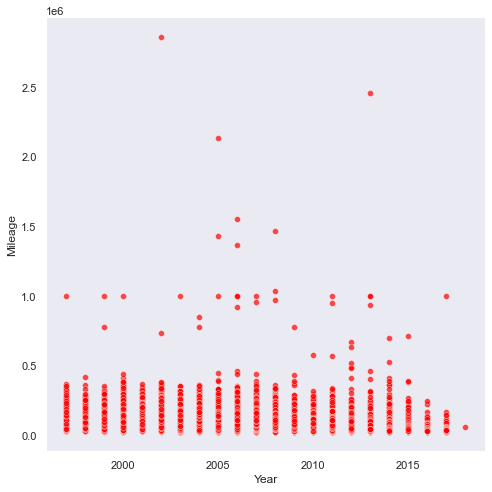

In [23]:
#Car usage levels 
sns.set_theme(style="dark")
sns.relplot(x="Year", y="Mileage", sizes=(40, 400), alpha=.7, height=7, data=data, color='red')

In [24]:
# Copying our data and drop the target from features (Price)


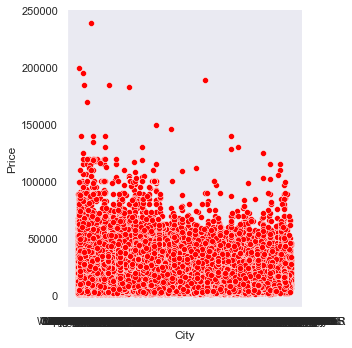

In [25]:
#Plotting the feature in order to conclude concerning its mutual information with the target, the car Price
sns.relplot(x="City", y="Price", data=data, color="red");

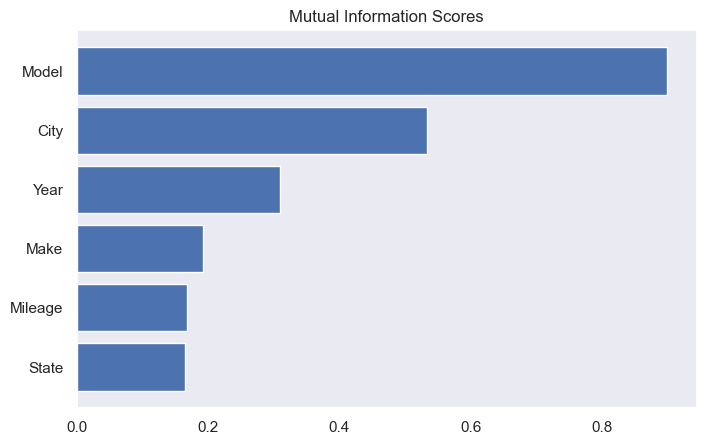

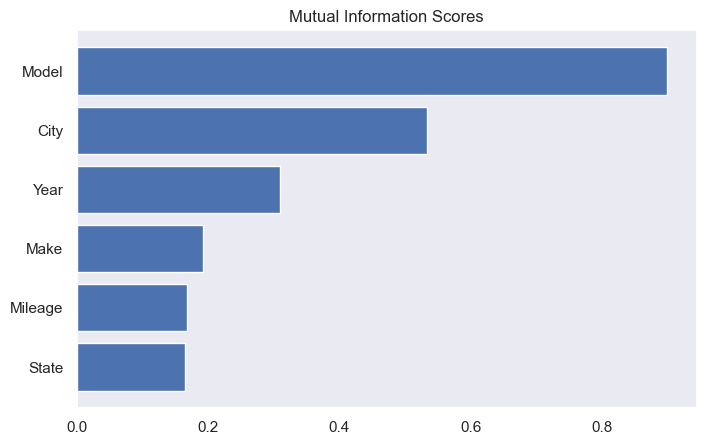

In [26]:
#As we can observe, city has little to no importance when it comes the price
X = data.copy()
y = X.pop("Price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should have integer dtypes 
discrete_features = X.dtypes == int

# This cell computes the MI scores for our features and wraps them up in a nice dataframe.

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:]

# Bar plot to make comparisions easier

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Bar plot to make comparisions easier

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/pyth

/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/pyth

Text(0.5, 1.0, 'Distribution of the old cars by the city of the seller')

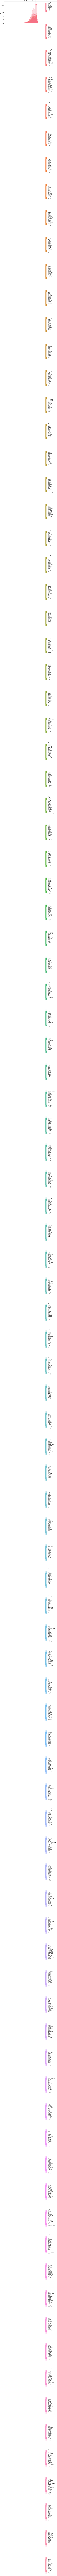

In [27]:
#Insights into the difference between old and new cars concerning sellers' cities
#Insights into the old cars concerning sellers' cities
# KDE plots for old set
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,6))
sns.kdeplot(data=oldSet, x='Year', hue='City', shade=True)

# Add title
plt.title("Distribution of the old cars by the city of the seller")

/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/mountasser/opt/anaconda3/lib/pyth

Text(0.5, 1.0, 'Distribution of the new cars by the city of the seller')

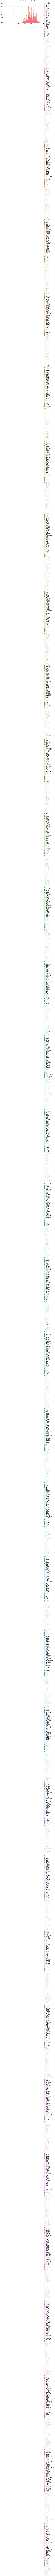

In [28]:
#Insights into the old cars concerning sellers' cities
# KDE plots for new set
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,6))
sns.kdeplot(data=newSet, x='Year', hue='City', shade=True)

# Add title
plt.title("Distribution of the new cars by the city of the seller")

In [29]:
#We can observe that, in the new set, there are way more oscillations compared to the old set.

Text(0.5, 1.0, 'Distribution of the old cars by the state of the seller')

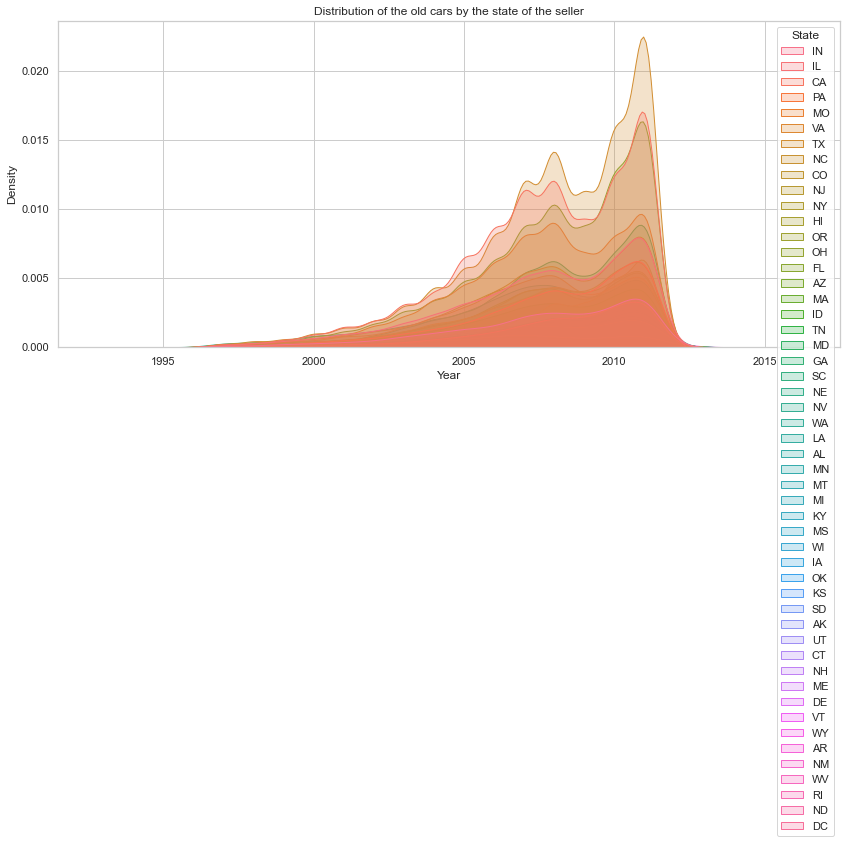

In [30]:
#Insights into the difference between old and new cars concerning sellers' states
#Insights into the old cars concerning sellers' states
# KDE plots for old set
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,6))
sns.kdeplot(data=oldSet, x='Year', hue='State', shade=True)

# Add title
plt.title("Distribution of the old cars by the state of the seller")

/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of the new cars by the state of the seller')

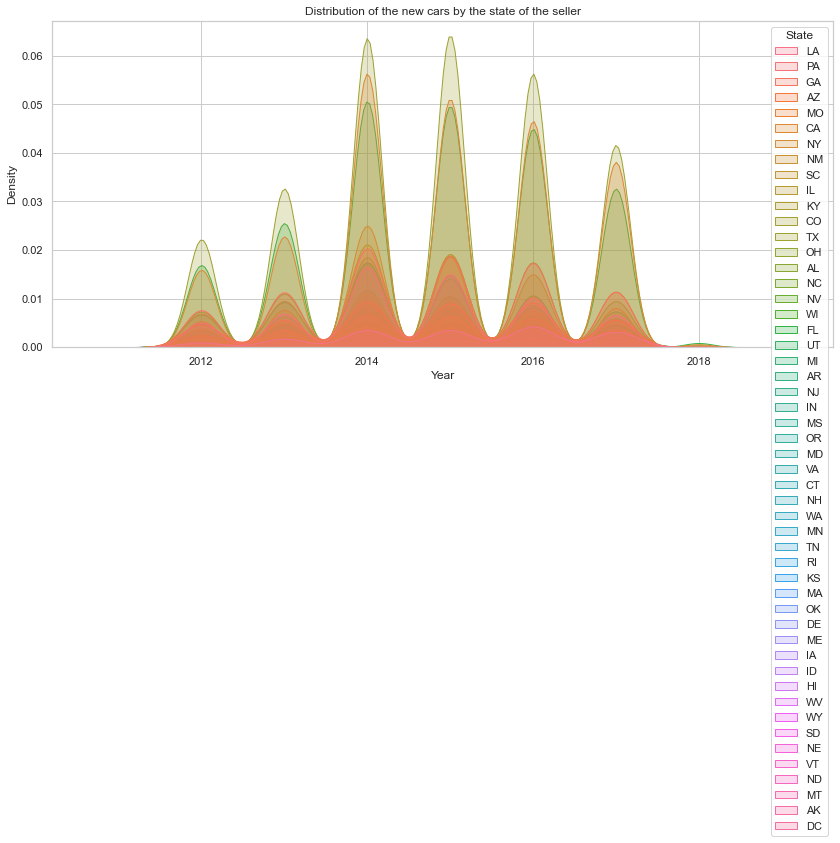

In [31]:
#Insights into the old cars concerning sellers' states
# KDE plots for old set
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,6))
sns.kdeplot(data=newSet, x='Year', hue='State', shade=True)

# Add title
plt.title("Distribution of the new cars by the state of the seller")

In [32]:
#Equally, there way more stable oscillations for all states in the new set compared to old set

<AxesSubplot:xlabel='Price', ylabel='Year'>

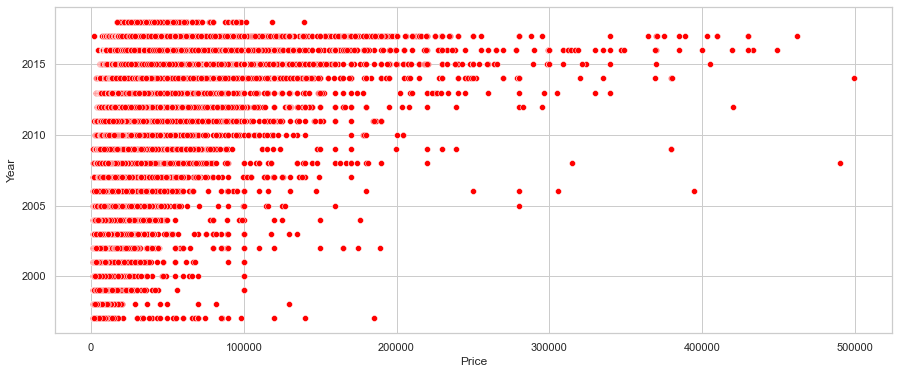

In [33]:
#Looking into the price of old and new sets
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(data=oldSet, x='Price', y='Year', color='red')
sns.scatterplot(data=newSet, x='Price', y='Year', color='red')

In [34]:
#It is now clear that car's price is in an increasing state in terms of the timeline

<AxesSubplot:xlabel='State', ylabel='Price'>

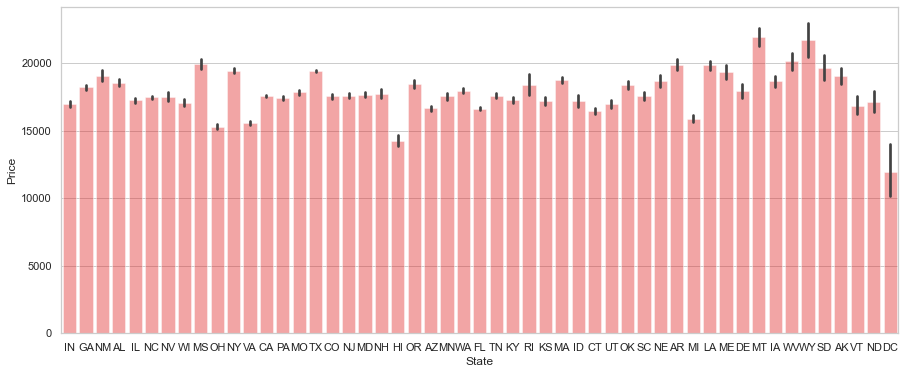

In [35]:
#Looking into the price of old and new sets in terms of seller's state
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(data=data, y='Price', x='State', color='red', alpha=.4)

In [36]:
#Generally speaking, there's little to neglectable effect to the price commited by the state.
#The only obvious is that DC containts slightly lower car prices compared to other states

<AxesSubplot:xlabel='Year', ylabel='Price'>

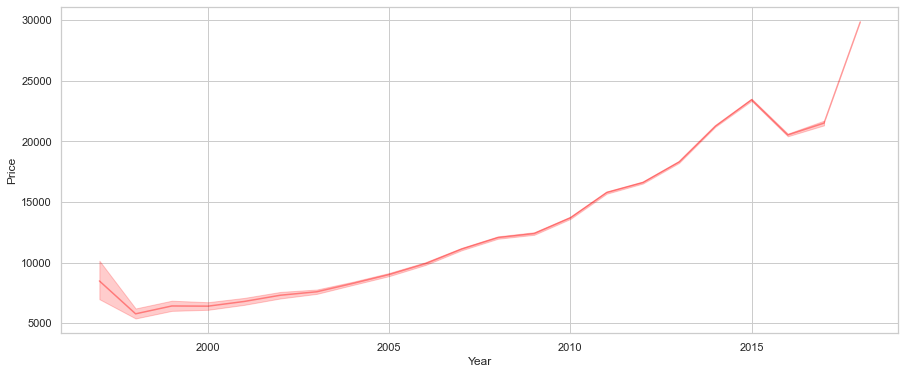

In [37]:
#Looking into the price changes compared to manufacturing year
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, y='Price', x='Year', color='red', alpha=.4)

In [38]:
#Clearly, the more recent the manufacturing year is, the more the car price increases except a few anomalic years

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

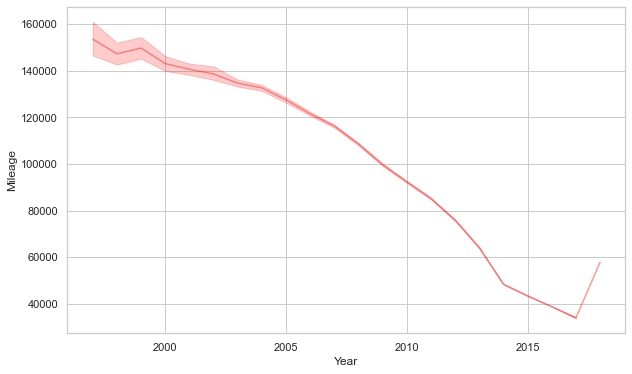

In [39]:
#Looking into the price of old and new sets in terms of seller's state
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Mileage', color='red', alpha=.4)

In [40]:
#Seemingly, yes. The more recent the car was manufactured, the less its mileage is. Kudos, makes sense ^_^

<AxesSubplot:xlabel='Count', ylabel='Make'>

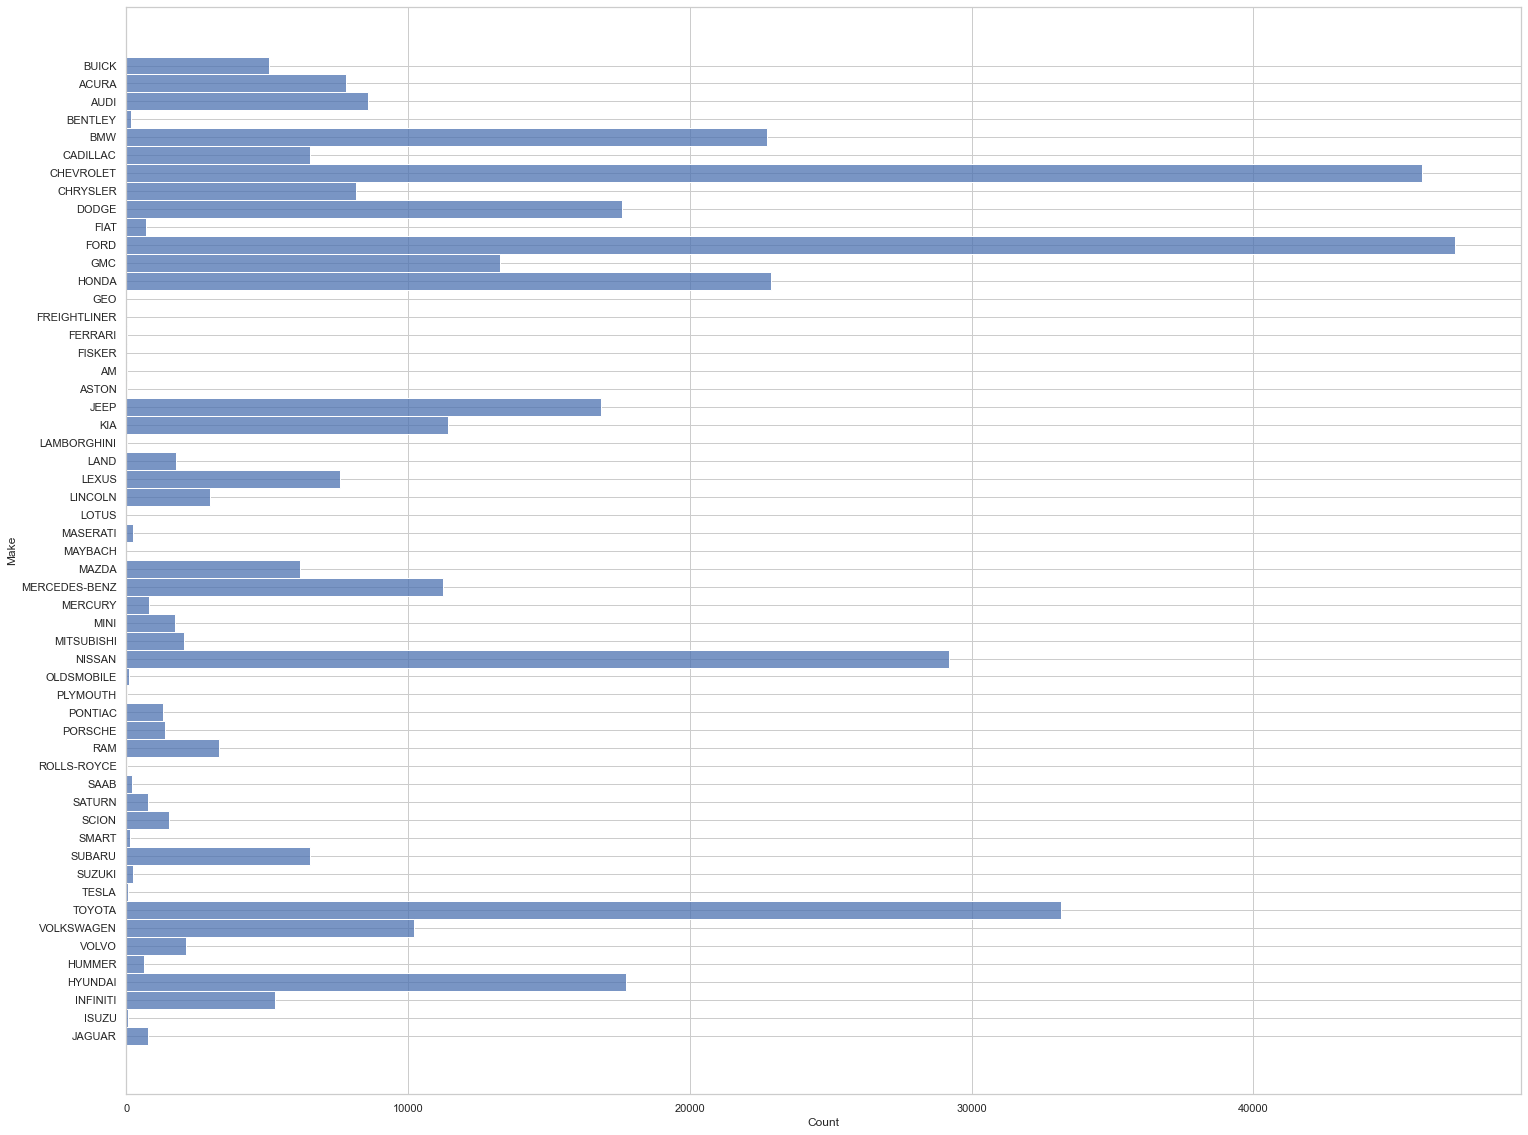

In [41]:
#Looking into the distribution of the cars in the market

sns.set_theme(style="whitegrid")
plt.figure(figsize=(25,20))

sns.histplot(data=data, y='Make')

<AxesSubplot:xlabel='Year', ylabel='Price'>

/Users/mountasser/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


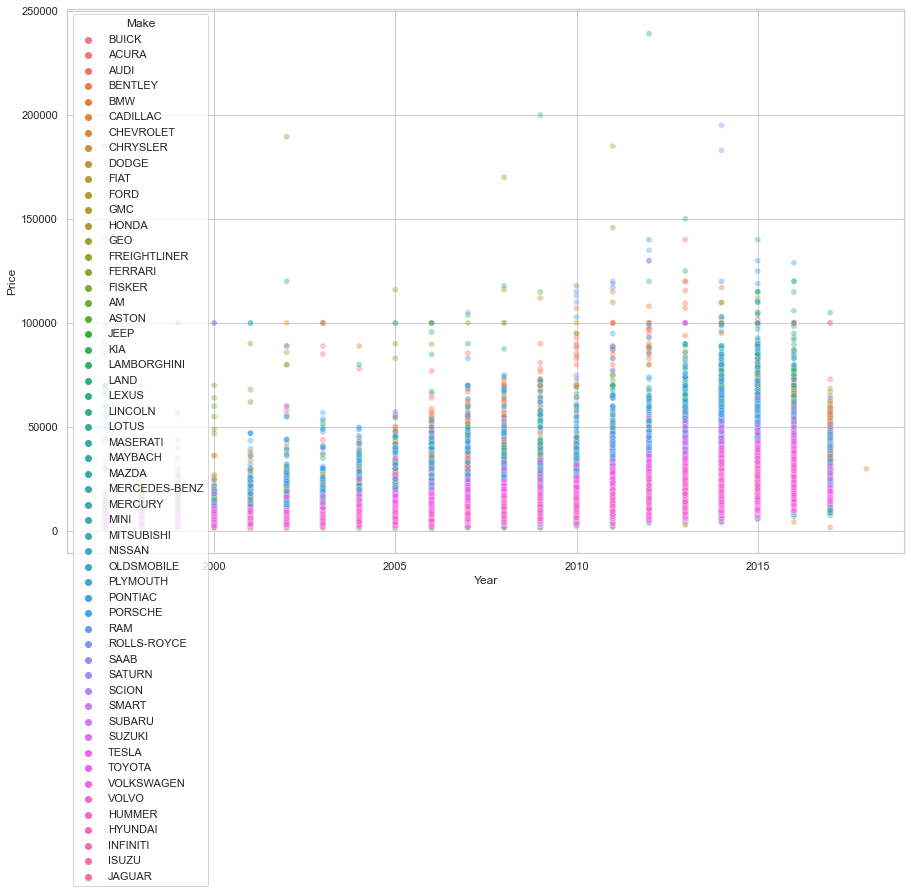

In [42]:
#Looking into certain brand cars according to the year of manufacturing
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, y='Price', x='Year', hue='Make', alpha=.4)

In [43]:
#Some brands' cars' prices got lower even though the recent year of manufacturing 

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

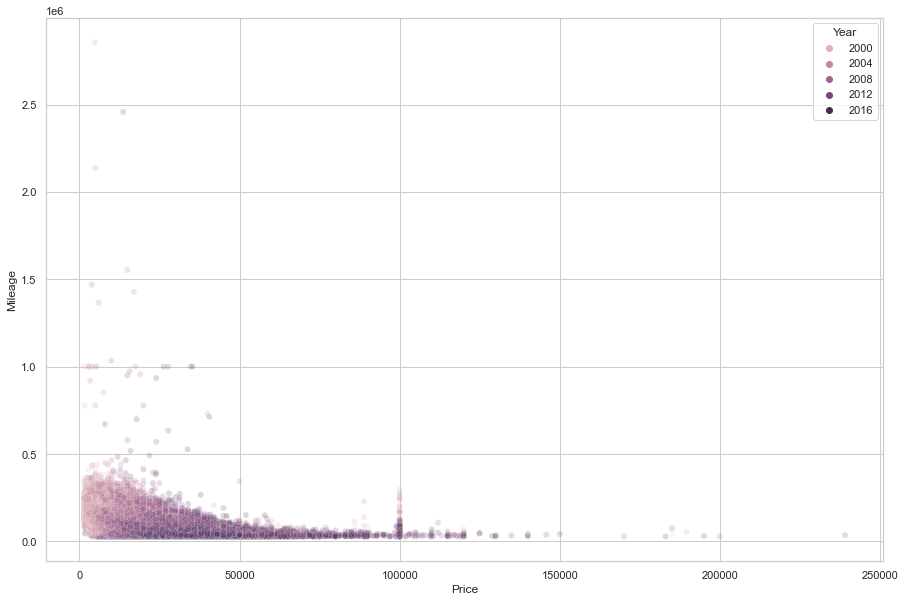

In [44]:
#Looking into a Relationship between Price, Year, and Mileage
features=list(['Price','Mileage','Year'])
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='Price', y='Mileage', hue='Year', alpha=.2)
#data[features].corr()

In [29]:
#Yes, increasing the year and the price automatically refers to less mileage.

In [2]:
#Removing unecessary index column for AWS Glue to detect the columns
data = pd.read_csv("/Users/mountasser/Desktop/Used Cars Project/Dataset/UsedCarsData.csv")
del data['Unnamed: 0']
data.head()


Price  Year  Mileage         City State   Make              Model
0   3950  2003   176935      Elkhart    IN  BUICK      RENDEZVOUSCXL
1  15999  2015    27410      Conyers    GA  BUICK          ENCOREFWD
2  21995  2015    36912  Albuquerque    NM  BUICK  VERANOCONVENIENCE
3  14900  2015    43214   Enterprise    AL  BUICK          ENCOREFWD
4  15499  2015    29539      Chicago    IL  BUICK  ENCORECONVENIENCE

In [3]:
from pathlib import Path  
filepath = Path('/Users/mountasser/Desktop/Used Cars Project/Dataset/UsedCarsData.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath, index=False)